In [1]:
# import packages
import numpy as np
import pandas as pd
import os
import os.path
import cv2
from PIL import Image
from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns

os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [2]:
# PyTorch Packages
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision 
from torchvision import transforms, datasets, models
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')
data_path = "Colab Notebooks/'Shopee Capstone Project'/"
import sys
sys.path.append('/content/drive/My Drive/{}'.format(data_path))

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
!ls drive/MyDrive/Colab\ Notebooks/Shopee_Capstone_Project

 image_data  'Shopee Image Neural Network.ipynb'   testdf.csv   traindf.csv


In [6]:
# Call Train and Test Dataframe 
traindf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Shopee_Capstone_Project/traindf.csv')

In [7]:
testdf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Shopee_Capstone_Project/testdf.csv')

In [8]:
#Dir = '/content/drive/MyDrive/Colab Notebooks/Shopee_Capstone_Project'
#test_data_dir = os.path.join(Dir, 'test_images')
#print(test_data_dir)
#print(len(os.listdir(test_data_dir)))

In [11]:
Dir = '/content/drive/MyDrive/Colab Notebooks/Shopee_Capstone_Project/image_data'
train_data_dir = os.path.join(Dir, 'train/*.jpg')
test_data_dir = os.path.join(Dir, 'test/*.jpg')
print(train_data_dir)
print(test_data_dir)
train_img_paths = list(glob(train_data_dir))
test_img_paths = list(glob(test_data_dir))
print(test_img_paths)

/content/drive/MyDrive/Colab Notebooks/Shopee_Capstone_Project/image_data/train/*.jpg
/content/drive/MyDrive/Colab Notebooks/Shopee_Capstone_Project/image_data/test/*.jpg
['/content/drive/MyDrive/Colab Notebooks/Shopee_Capstone_Project/image_data/test/0006c8e5462ae52167402bac1c2e916e.jpg', '/content/drive/MyDrive/Colab Notebooks/Shopee_Capstone_Project/image_data/test/0007585c4d0f932859339129f709bfdc.jpg', '/content/drive/MyDrive/Colab Notebooks/Shopee_Capstone_Project/image_data/test/0008377d3662e83ef44e1881af38b879.jpg']


In [12]:
list(map(print, test_img_paths))

/content/drive/MyDrive/Colab Notebooks/Shopee_Capstone_Project/image_data/test/0006c8e5462ae52167402bac1c2e916e.jpg
/content/drive/MyDrive/Colab Notebooks/Shopee_Capstone_Project/image_data/test/0007585c4d0f932859339129f709bfdc.jpg
/content/drive/MyDrive/Colab Notebooks/Shopee_Capstone_Project/image_data/test/0008377d3662e83ef44e1881af38b879.jpg


[None, None, None]

# Generate necessary dataframes and image paths 




In [13]:
# Test to see that the images have been mounted 
count_train = len(train_img_paths)
count_test = len(test_img_paths)
print(count_train, count_test)

32424 3


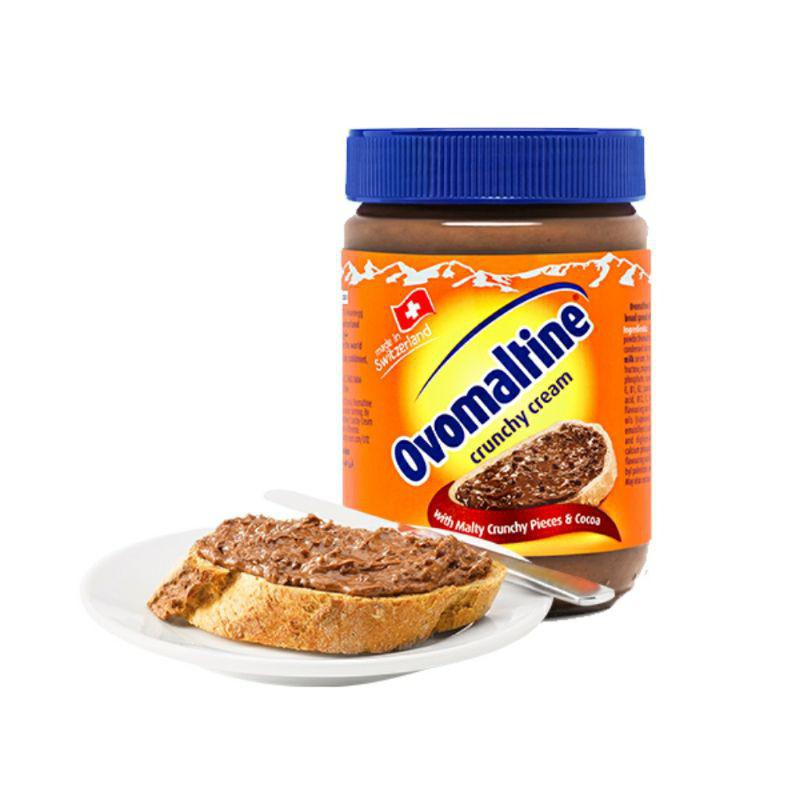

In [17]:
# Test print first image in train images
from google.colab.patches import cv2_imshow

img = cv2.imread(train_img_paths[0])
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
# Creating a DataFrame with just label_group  
label = traindf.groupby('label_group')['image'].count().reset_index()
label.columns = ['label_group','image_number']
label

,label_group,image_number
0,258047,3
1,297977,2
2,645628,12
3,801176,2
4,887886,2
...,...,...
11009,4292154092,2
11010,4292520070,11
11011,4292939171,2
11012,4293276364,2


In [19]:
sortlabel = label.sort_values('image_number')
sortlabel

,label_group,image_number
3764,1471548468,2
8718,3381177724,2
4946,1934657835,2
8720,3381497963,2
4943,1932824351,2
...,...,...
2606,994676122,51
8037,3113678103,51
1445,562358068,51
9370,3627744656,51


In [20]:
# Make a temporary dataframe with the top 21 label group classes
tmpdf = sortlabel.iloc[-21:]
tmpdf

,label_group,image_number
161,66247839,34
2267,871679006,34
4004,1575763518,34
1884,731330024,35
10753,4184214313,35
1152,452508504,35
5129,2008989859,35
4472,1746655739,36
3222,1237550763,37
9011,3489985175,41


In [21]:
# Sum of the images in these 21 label groups 
sum_label = tmpdf['image_number'].sum()
print(sum_label)

899


In [22]:
for col in tmpdf.columns:
    print(col + ":" + str(len(tmpdf[col].unique())))

label_group:21
image_number:9


In [23]:
# Create a reduced train df
reduced_trainlist = tmpdf['label_group'].tolist()
print(reduced_trainlist)

[66247839, 871679006, 1575763518, 731330024, 4184214313, 452508504, 2008989859, 1746655739, 1237550763, 3489985175, 1091404026, 1733221456, 1166650192, 3206118280, 1141798720, 1163569239, 994676122, 3113678103, 562358068, 3627744656, 159351600]


In [24]:
reduced_traindf = traindf[traindf['label_group'].isin(reduced_trainlist)]
reduced_traindf

,posting_id,image,image_phash,title,label_group,path
50,train_3497907844,007be583a5a4edc3fc54b0779e141a9f.jpg,9ba6cc31a427a675,ARSHOP MAYCREATE MOISTURIZING UV SPRAY 150ML (...,1141798720,./data/train_images/007be583a5a4edc3fc54b0779e...
63,train_1734882388,008a7e4f77c10f36ace0314cff98ba09.jpg,da00a03e871f9f37,TZUKI SOAP 1 PCS,3489985175,./data/train_images/008a7e4f77c10f36ace0314cff...
75,train_3043787667,00a798efae9db3d6d5324daebfea2652.jpg,e9949669b54a199d,SABUN TZUKI,3489985175,./data/train_images/00a798efae9db3d6d5324daebf...
85,train_4175229751,00b9f86046a30f68841671d510077cc6.jpg,a9b6c30b36f03b49,\xe2\x9d\xa4 RATU \xe2\x9d\xa4 MAYCREATE MOIST...,1141798720,./data/train_images/00b9f86046a30f68841671d510...
96,train_3879247647,00cefe6ea00dafa4e441757802c72636.jpg,fc8e8e9e87713061,(Bundling 2 Pcs) Acnol Lotion 10Ml Acne Lotion...,1746655739,./data/train_images/00cefe6ea00dafa4e441757802...
...,...,...,...,...,...,...
34116,train_497353894,feee3c1c061171989379349c6bec550e.jpg,b947cf1d4c3c30e2,Kuas Mentega Oles Masak Minyak Roti Kue Barbeq...,1733221456,./data/train_images/feee3c1c061171989379349c6b...
34130,train_1431505272,ff13824e97134b3fd52fdd0c5bfb3336.jpg,d6aec150632f2bb1,100 PCS Ikat Karet Rambut Elastis Gaya Korea -...,994676122,./data/train_images/ff13824e97134b3fd52fdd0c5b...
34167,train_3766853345,ff5e955ddd5d278f570bbd74dd0bc5e9.jpg,eb915c62916e955c,RSB COD 1PCS Tutup Pentil LED Nyala Lampu Roda...,1575763518,./data/train_images/ff5e955ddd5d278f570bbd74dd...
34183,train_2767483557,ff7bf54d9da67bada330825ef9bd25c7.jpg,929fc245682fb5b4,100 Pcs Ikat Rambut Karet Polos Elastis Gaya K...,994676122,./data/train_images/ff7bf54d9da67bada330825ef9...


In [25]:
# # Make a new folder of images from reduced train df
# import shutil

# input_path= '/content/drive/MyDrive/Colab Notebooks/Shopee_Capstone_Project/image_data/train'
# output_path='/content/drive/MyDrive/Colab Notebooks/Shopee_Capstone_Project/image_data/reduced_train'

# i = 1 # intilize counter
# for row in reduced_traindf.iterrows():
#   z = row[1]['image'] # 0 gets index, [1] has the information (image name) ->
#   input_file = os.path.join(input_path, z)
#   output_file = os.path.join(output_path, z)

#   if os.path.exists(output_file) == False:
#     print(i, ' file not copied:', z) # Printing images not copied into new folder

#     shutil.copy2(input_file, output_file)
#     i+=1 # increment counter


In [26]:
reduced_train_data_dir = os.path.join(Dir, 'reduced_train/*')
print(reduced_train_data_dir)
reduced_train_img_paths = list(glob(reduced_train_data_dir))

count_reduced_train = len(reduced_train_img_paths)
print(count_reduced_train)

/content/drive/MyDrive/Colab Notebooks/Shopee_Capstone_Project/image_data/reduced_train/*
827


In [27]:
# Number of copied photos is not equal to number of data frame rows. 
# Checking if duplicated images are not being copied, do not need to use keep because duplicated # of duplicates is max 2 per an image
tmpdf = reduced_traindf['image']
print(tmpdf.duplicated().sum())

72


In [29]:
# # Verfy identical images have the same label group

# tmpdf = reduced_traindf[['image','label_group']]

# tmpdf = tmpdf.assign(is_duplicate= lambda d: d.duplicated())
# tmpdf2= tmpdf[tmpdf['is_duplicate']]
# tmpdf2

# sort_tmpdf2 = tmpdf2.sort_values('image')
# sort_tmpdf2

In [30]:
# # Mapping label_group to an index, and mapping an index to a label_group
# index_to_label_group = {}
# label_group_to_index = {}

# i = 0

# for row in label.iterrows():
#     # print(row[1]['label_group'])  # Test to see desired rows information is beting called
#     # print(type(row[1]['label_group']))
#     val = row[1]['label_group']
#     if val in label_group_to_index.keys():
#       continue 

#     index_to_label_group[i] = val
#     label_group_to_index[val] = i
#     i+=1

# # Quality check Print Statments
# print(index_to_label_group[0])
# print(label_group_to_index[258047])
# print(len(index_to_label_group))
# print(len(label_group_to_index))

258047
0
11014
11014


In [31]:
### Mapping like above, but for the reduced data set 
# Mapping label_group to an index, and mapping an index to a label_group
index_to_label_group_reduce = {}
label_group_to_index_reduce = {}

i = 0

for row in reduced_traindf.iterrows():
#     print(row[1]['label_group'])  # Test to see desired rows information is beting called
#     print(type(row[1]['label_group']))
    val = row[1]['label_group']
    if val in label_group_to_index_reduce.keys():
      continue

    index_to_label_group_reduce[i] = val
    label_group_to_index_reduce[val] = i
    i+=1

# Quality check
print(index_to_label_group_reduce[0])
print(label_group_to_index_reduce[1141798720])
print(len(index_to_label_group_reduce))
print(len(label_group_to_index_reduce))

1141798720
0
21
21


## Function to dataload the images and labels for PyTorch

In [32]:
# # Set a random augumation transform 
# import random
# from torchvision import transforms
# from torchvision.transforms import Compose as C

# def aug(p = 0.5):
#   r = random.randint(0,2)
#   if r == 0:
#     return transforms.RandomHorizontalFlip(p=p)
#   elif r == 1:
#     return transforms.RandomVerticalFlip(p=p)
#   else:
#     return transforms.RandomGrayscale(p=p)

In [33]:
# Intilizing Pytorch Dataset class to feed into DataLoader
device_cpu = torch.device("cpu")
device_gpu = torch.device("cuda")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class dataset(Dataset): 
    def __init__(self, img_paths, labels): # initialize self, the image paths, and transform
        self.p = 0.3
        self.img_paths = img_paths # list of image paths
        self.label_df = labels # A dataframe of either train or test which contain the labels under label_group
        self.transform = transforms.Compose([transforms.Resize((256,256)), transforms.ToTensor()]) # transforming into a tensor
        #, transforms.RandomVerticalFlip(p=self.p), transforms.RandomHorizontalFlip(p=self.p), transforms.RandomGrayscale(p=self.p)
        self.device = device
    
    # Calling the whole dataset, in this case imgs
    def __len__(self):
        return len(self.img_paths)
    
    # Loading in the input images and getting their labels
    def __getitem__(self, index):      ## Index into image paths to get image path and do the pre processing of 
                                       ## loading the image into get_item
        path = self.img_paths[index]
        

        path_token = path.split('/') # set delimenter to '/'
        img_name = path_token[-1] # take last token with image name
        potential_label_group = traindf.loc[traindf['image'] == img_name, 'label_group'].values
  
        y = self.label_df.loc[self.label_df['image'] == img_name, 'label_group'].values # Find label grouping with image name == image name 

        if len(y) > 0: # If there is at least one entry with matching image name then get label grouping for the image 
          y = y[0] 
        else: 
          path = self.img_paths[0] # If no label grouping for image then send first image 
          path_token = path.split('/') 
          img_name = path_token[-1] 
          y = self.label_df.loc[self.label_df['image'] == img_name, 'label_group'].values[0]

        img = cv2.imread(path) # Calling image from image list (after passing the if statement)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # making sure all images are in RGB
        img_pil = Image.fromarray(img) # Transform numpy image (from cv2) into PIL image class for train Epoch stage
        
        # aug_transform = aug() # call function aug from above 
        # print('img pil type: ', img_pil.type)
        # aug_img = aug_transform(img_pil) # pass in the image to transform with probability 0.5 -> NECESSSARY AUGMENTING IMAGES

        x = self.transform(img_pil) # Transform image
        x = x.to(self.device, dtype=torch.float) # Send image to device


        # y = label_group_to_index[y]  # Getting the associated index with the label group y (y is a given label group)
        y = label_group_to_index_reduce[y] #######  Changed map for reduced photo test  ######

        y = torch.as_tensor(np.array(y), dtype = torch.int64)
        y = y.to(self.device) # Send y to device
        
        return x, y
    

## Split Images to Train, Test, and Validation 

In [34]:
    # # This function splits the list of samples from the dataset into train, validation, & test 
    #     # to benchmark the model before the test_image folder
    # def collate_fn(batch):
    # # combines individual data point tuples (x,y) into single giant tuple
    #     return tuple(zip(*batch))

    # # Split into training, validation, and test from the traing images list
    # print("train img len: ", len(train_img_paths))
    # data = dataset(train_img_paths, traindf)
    # num_images = len(train_img_paths)
    # train_size = int(np.ceil(0.8 * num_images))
    # val_size = int(np.ceil(0.1 * num_images))
    # test_size = int(np.floor(0.1 * num_images))
    
    # print("Total data size:", num_images)
    # print("Training set size:", train_size)
    # print("Validation set size:", val_size)
    # print("Test set seize:", test_size)
    
    # # Randomize the split
    # train_data, val_data, test_data = torch.utils.data.random_split(data, (train_size, val_size, test_size))

In [35]:
  # Split the data set for the reduced df 

  # This function splits the list of samples from the dataset into train, validation, & test 
  # to benchmark the model before the test_image folder
  def collate_fn(batch):
  # combines individual data point tuples (x,y) into single giant tuple
    return tuple(zip(*batch))

  # Split into training, validation, and test from the traing images list
  print("reduced train img len: ", len(reduced_train_img_paths))
  data = dataset(reduced_train_img_paths, reduced_traindf)
  num_images = len(reduced_train_img_paths) 
  train_size = int(np.ceil(0.8 * num_images))
  val_size = int(np.ceil(0.1 * num_images))
  test_size = int(np.floor(0.1 * num_images))
  
  print("Total data size:", num_images)
  print("Training set size:", train_size)
  print("Validation set size:", val_size)
  print("Test set seize:", test_size)
  
  # Randomize the split
  train_data, val_data, test_data = torch.utils.data.random_split(data, (train_size, val_size, test_size))

reduced train img len:  827
Total data size: 827
Training set size: 662
Validation set size: 83
Test set seize: 82


### Set Batchsize and Intiate DataLoader

In [36]:
# set batch size 
batch_size = 75
#num_workers = 2

In [37]:
# Dataload Training Dataset 
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True, )

In [38]:
val_dataloader = torch.utils.data.DataLoader(val_data, batch_size = batch_size, shuffle = True, )

In [39]:
# Dataload Test Dataset from the train_img_paths
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = False, )

## Models

In [40]:
#   # Use personally created Neural Network based on the CNN model 
#   # nn.Sequential sets the sequals of modeal models from pytorch to use in our neural network 
#       # from torchsummary import summary
# # device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# # device_cpu = torch.device('cpu')
 
# model = nn.Sequential(
#             #input=(3,256,256), output=(6, 256,256)
#             nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3), # 3 input for RGB, and 6 output b/c doubling is standard
#             nn.ReLU(),
#             #input=(6,256,256), output=(6, 128,128)
#             nn.MaxPool2d(kernel_size=2), # Max pool kenral size=2 means cut max pixel value by half
            
#             #input=(6,128,128), output=(12,128,128)
#             nn.Conv2d(in_channels=6, out_channels=12, kernel_size=3),
#             nn.ReLU(),
#             #input=(12,128,128), output=(12,64,64)
#             nn.MaxPool2d(kernel_size=2),

#             #input=(12, 64, 64), output=(24, 64, 64)
#             nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3),
#             nn.ReLU(),
#             #input=(24, 64, 64), output=(24, 32, 32)
#             nn.MaxPool2d(kernel_size=2),


#             nn.Flatten(start_dim=1),
#             nn.Linear(24*30*30, 512), # 512 is arbiturary number for reduced traning, oringal train had all classes of 11014 and ended after the following ReLU() 
#             nn.ReLU(),
#             nn.Linear(512, 21),
#             nn.ReLU(),
#             # nn.Softmax(dim=0)
#             )
# #print(device_cpu.type)

# model.to(device) ### REMEMBER TO CHANGE TO device FOR GPU ###

# #summary(model, (3, 255,255) , device=device.type)         

Sequential(
  (0): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Flatten(start_dim=1, end_dim=-1)
  (10): Linear(in_features=21600, out_features=512, bias=True)
  (11): ReLU()
  (12): Linear(in_features=512, out_features=21, bias=True)
  (13): ReLU()
)

In [52]:
# Use model arcitecture EfficentNetB0, w/o pre-trained weights (Loading an EfficientNet)
import torchvision.models as models 
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights
from torchvision.models import efficientnet_b0 
from torchvision import transforms

# model = models.efficientnet_b0().to(device)

# params = [p for p in model.parameters() if p.requires_grad]

In [59]:
  #  pip install efficientnet_pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=b27800d6092204c9602eb66cce4cefef8f95f9589c468191e05d385374265756
  Stored in directory: /root/.cache/pip/wheels/0e/cc/b2/49e74588263573ff778da58cc99b9c6349b496636a7e165be6
Successfully built efficientnet-pytorch


In [60]:
# Use a pretrained model of EfficentNetB0 (Loading a pretrained Eccicientnet)
from efficientnet_pytorch import EfficientNet

device_gpu = torch.device("cuda")

model = EfficientNet.from_pretrained('efficientnet-b0')
model = model.to(device)

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth


  0%|          | 0.00/20.4M [00:00<?, ?B/s]

Loaded pretrained weights for efficientnet-b0


In [61]:
# Transfer Learning, blockings some layers from the model

In [62]:
# loss function , Cross Entropy Loss combines log softmax and negative log likelihood 
criterion = nn.CrossEntropyLoss()

In [63]:
# optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0001)

Function to train model predictions

In [64]:
from tqdm import tqdm
import time 

def train_model(model, train_dataloader, val_dataloader, num_epochs=5):

    saved_epoch_train_loss = []
    saved_train_acc = []
    saved_val_acc = []

    for epoch in tqdm(range(num_epochs)):  # loop over the dataset multiple times
        epoch_loss = 0 
        running_train_corrects = 0 
        running_val_corrects = 0 
        i = 0 #intiate counter
        for x, y in train_dataloader:
            # print('x: ', x.shape)
            # print('x: ', x, ' y: ', y)
            optimizer.zero_grad()
            
            out = model(x)
            # print('out_shape: ', out.shape)
            # print('out:', out)
            # print('y: ', y.shape)
            # print('y:', y)
            
            _, preds = torch.max(out, 1)
            # print('predictions:', preds)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()
            running_train_corrects += torch.sum(torch.eq(preds, y))
            
            epoch_loss += loss 

            if  i == 5000: #State counter for every 1,000 processes ( i % 5000)
              break #print(i) - for debugging 
            i += 1
        saved_epoch_train_loss.append(epoch_loss)
        print("\nEpoch:", epoch+1, "Loss: {:.5f}".format(epoch_loss)) 

        with torch.no_grad():
          for x, y in val_dataloader:
            out = model(x)
            _, preds = torch.max(out,1)
            loss = criterion(out,y)
            running_val_corrects += torch.sum(torch.eq(preds,y))
        
        train_acc = running_train_corrects.double() / len(train_dataloader.dataset)
        saved_train_acc.append(train_acc)
        print("Training accuracy: {:4f}".format(train_acc))
        
        val_acc = running_val_corrects.double() / len(val_dataloader.dataset)
        saved_val_acc.append(val_acc)
        print("Validation accuracy: {:4f}".format(val_acc))
      
    return saved_epoch_train_loss, saved_train_acc, saved_val_acc


In [65]:
# Call my model and train model on dataloader
# test model on validation data 

saved_epoch_train_loss, saved_train_acc, saved_val_acc = train_model(model, train_dataloader, val_dataloader, num_epochs=50)

  0%|          | 0/50 [00:00<?, ?it/s]


Epoch: 1 Loss: 67.63678


  2%|▏         | 1/50 [00:23<18:55, 23.18s/it]

Training accuracy: 0.001511
Validation accuracy: 0.000000

Epoch: 2 Loss: 63.77884


  4%|▍         | 2/50 [00:41<16:02, 20.05s/it]

Training accuracy: 0.003021
Validation accuracy: 0.000000

Epoch: 3 Loss: 58.79409


  6%|▌         | 3/50 [00:58<14:51, 18.98s/it]

Training accuracy: 0.018127
Validation accuracy: 0.036145

Epoch: 4 Loss: 52.67197


  8%|▊         | 4/50 [01:16<14:17, 18.64s/it]

Training accuracy: 0.075529
Validation accuracy: 0.096386

Epoch: 5 Loss: 47.17646


 10%|█         | 5/50 [01:34<13:45, 18.34s/it]

Training accuracy: 0.149547
Validation accuracy: 0.156627

Epoch: 6 Loss: 41.37204


 12%|█▏        | 6/50 [01:53<13:30, 18.43s/it]

Training accuracy: 0.267372
Validation accuracy: 0.228916

Epoch: 7 Loss: 36.20730


 14%|█▍        | 7/50 [02:11<13:03, 18.22s/it]

Training accuracy: 0.356495
Validation accuracy: 0.253012

Epoch: 8 Loss: 31.26820


 16%|█▌        | 8/50 [02:28<12:38, 18.07s/it]

Training accuracy: 0.448640
Validation accuracy: 0.337349

Epoch: 9 Loss: 27.59721


 18%|█▊        | 9/50 [02:46<12:16, 17.97s/it]

Training accuracy: 0.537764
Validation accuracy: 0.433735

Epoch: 10 Loss: 23.72412


 20%|██        | 10/50 [03:04<11:56, 17.91s/it]

Training accuracy: 0.616314
Validation accuracy: 0.457831

Epoch: 11 Loss: 20.33077


 22%|██▏       | 11/50 [03:22<11:37, 17.88s/it]

Training accuracy: 0.696375
Validation accuracy: 0.554217

Epoch: 12 Loss: 17.21364


 24%|██▍       | 12/50 [03:39<11:18, 17.87s/it]

Training accuracy: 0.752266
Validation accuracy: 0.626506

Epoch: 13 Loss: 14.45314


 26%|██▌       | 13/50 [03:57<11:01, 17.88s/it]

Training accuracy: 0.815710
Validation accuracy: 0.638554

Epoch: 14 Loss: 12.28496


 28%|██▊       | 14/50 [04:15<10:45, 17.92s/it]

Training accuracy: 0.835347
Validation accuracy: 0.746988

Epoch: 15 Loss: 10.33114


 30%|███       | 15/50 [04:33<10:28, 17.95s/it]

Training accuracy: 0.876133
Validation accuracy: 0.710843

Epoch: 16 Loss: 8.58240


 32%|███▏      | 16/50 [04:51<10:11, 17.98s/it]

Training accuracy: 0.906344
Validation accuracy: 0.771084

Epoch: 17 Loss: 7.71403


 34%|███▍      | 17/50 [05:09<09:52, 17.94s/it]

Training accuracy: 0.916918
Validation accuracy: 0.807229

Epoch: 18 Loss: 6.29735


 36%|███▌      | 18/50 [05:27<09:33, 17.91s/it]

Training accuracy: 0.939577
Validation accuracy: 0.843373

Epoch: 19 Loss: 5.18290


 38%|███▊      | 19/50 [05:45<09:14, 17.89s/it]

Training accuracy: 0.954683
Validation accuracy: 0.867470

Epoch: 20 Loss: 4.42596


 40%|████      | 20/50 [06:03<08:56, 17.88s/it]

Training accuracy: 0.962236
Validation accuracy: 0.879518

Epoch: 21 Loss: 3.79645


 42%|████▏     | 21/50 [06:21<08:37, 17.85s/it]

Training accuracy: 0.971299
Validation accuracy: 0.855422

Epoch: 22 Loss: 3.40972


 44%|████▍     | 22/50 [06:38<08:19, 17.85s/it]

Training accuracy: 0.971299
Validation accuracy: 0.807229

Epoch: 23 Loss: 2.95568


 46%|████▌     | 23/50 [06:57<08:03, 17.91s/it]

Training accuracy: 0.975831
Validation accuracy: 0.879518

Epoch: 24 Loss: 2.70137


 48%|████▊     | 24/50 [07:14<07:45, 17.90s/it]

Training accuracy: 0.980363
Validation accuracy: 0.879518

Epoch: 25 Loss: 2.61387


 50%|█████     | 25/50 [07:32<07:26, 17.87s/it]

Training accuracy: 0.980363
Validation accuracy: 0.831325

Epoch: 26 Loss: 2.23358


 52%|█████▏    | 26/50 [07:50<07:08, 17.85s/it]

Training accuracy: 0.980363
Validation accuracy: 0.831325

Epoch: 27 Loss: 1.86997


 54%|█████▍    | 27/50 [08:08<06:50, 17.85s/it]

Training accuracy: 0.987915
Validation accuracy: 0.855422

Epoch: 28 Loss: 1.73363


 56%|█████▌    | 28/50 [08:26<06:32, 17.84s/it]

Training accuracy: 0.984894
Validation accuracy: 0.915663

Epoch: 29 Loss: 1.69792


 58%|█████▊    | 29/50 [08:44<06:15, 17.87s/it]

Training accuracy: 0.986405
Validation accuracy: 0.903614

Epoch: 30 Loss: 1.58383


 60%|██████    | 30/50 [09:01<05:56, 17.84s/it]

Training accuracy: 0.990937
Validation accuracy: 0.915663

Epoch: 31 Loss: 1.46483


 62%|██████▏   | 31/50 [09:19<05:38, 17.82s/it]

Training accuracy: 0.989426
Validation accuracy: 0.879518

Epoch: 32 Loss: 1.28641


 64%|██████▍   | 32/50 [09:37<05:20, 17.82s/it]

Training accuracy: 0.986405
Validation accuracy: 0.891566

Epoch: 33 Loss: 1.26890


 66%|██████▌   | 33/50 [09:55<05:02, 17.79s/it]

Training accuracy: 0.989426
Validation accuracy: 0.891566

Epoch: 34 Loss: 1.18021


 68%|██████▊   | 34/50 [10:12<04:44, 17.76s/it]

Training accuracy: 0.990937
Validation accuracy: 0.891566

Epoch: 35 Loss: 1.15546


 70%|███████   | 35/50 [10:30<04:26, 17.75s/it]

Training accuracy: 0.993958
Validation accuracy: 0.891566

Epoch: 36 Loss: 1.06565


 72%|███████▏  | 36/50 [10:48<04:08, 17.76s/it]

Training accuracy: 0.989426
Validation accuracy: 0.903614

Epoch: 37 Loss: 0.98149


 74%|███████▍  | 37/50 [11:06<03:51, 17.79s/it]

Training accuracy: 0.992447
Validation accuracy: 0.927711

Epoch: 38 Loss: 0.94583


 76%|███████▌  | 38/50 [11:23<03:33, 17.76s/it]

Training accuracy: 0.992447
Validation accuracy: 0.867470

Epoch: 39 Loss: 0.82240


 78%|███████▊  | 39/50 [11:41<03:15, 17.77s/it]

Training accuracy: 0.990937
Validation accuracy: 0.891566

Epoch: 40 Loss: 0.78562


 80%|████████  | 40/50 [11:59<02:57, 17.78s/it]

Training accuracy: 0.993958
Validation accuracy: 0.879518

Epoch: 41 Loss: 0.62592


 82%|████████▏ | 41/50 [12:17<02:40, 17.81s/it]

Training accuracy: 0.995468
Validation accuracy: 0.879518

Epoch: 42 Loss: 0.79838


 84%|████████▍ | 42/50 [12:35<02:22, 17.78s/it]

Training accuracy: 0.995468
Validation accuracy: 0.903614

Epoch: 43 Loss: 0.64185


 86%|████████▌ | 43/50 [12:52<02:04, 17.76s/it]

Training accuracy: 0.993958
Validation accuracy: 0.903614

Epoch: 44 Loss: 0.60423


 88%|████████▊ | 44/50 [13:10<01:46, 17.78s/it]

Training accuracy: 0.996979
Validation accuracy: 0.867470

Epoch: 45 Loss: 0.59382


 90%|█████████ | 45/50 [13:28<01:28, 17.79s/it]

Training accuracy: 0.995468
Validation accuracy: 0.903614

Epoch: 46 Loss: 0.67575


 92%|█████████▏| 46/50 [13:46<01:11, 17.79s/it]

Training accuracy: 0.996979
Validation accuracy: 0.915663

Epoch: 47 Loss: 0.43168


 94%|█████████▍| 47/50 [14:04<00:53, 17.77s/it]

Training accuracy: 0.996979
Validation accuracy: 0.927711

Epoch: 48 Loss: 0.56527


 96%|█████████▌| 48/50 [14:21<00:35, 17.80s/it]

Training accuracy: 0.996979
Validation accuracy: 0.879518

Epoch: 49 Loss: 0.42348


 98%|█████████▊| 49/50 [14:39<00:17, 17.80s/it]

Training accuracy: 0.998489
Validation accuracy: 0.915663

Epoch: 50 Loss: 0.43667


100%|██████████| 50/50 [14:57<00:00, 17.95s/it]

Training accuracy: 0.998489
Validation accuracy: 0.915663


### Plotting Training Loss and Accuracy 

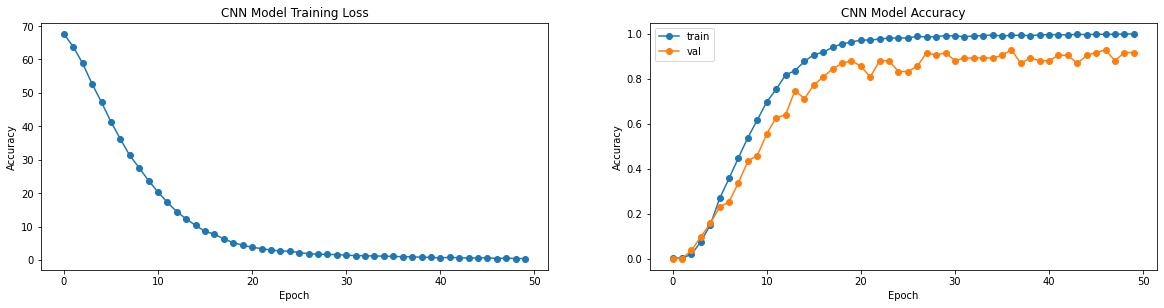

In [66]:
# Convert the tensors into numpys to plot 

for i in range(len(saved_epoch_train_loss)):
   saved_epoch_train_loss[i] = saved_epoch_train_loss[i].cpu()

for i in range(len(saved_train_acc)):
   saved_train_acc[i] = saved_train_acc[i].cpu()

for i in range(len(saved_epoch_train_loss)):
   saved_val_acc[i] = saved_val_acc[i].cpu()

for i in range(len(saved_epoch_train_loss)):
   saved_epoch_train_loss[i] = saved_epoch_train_loss[i].detach().numpy()

for i in range(len(saved_train_acc)):
   saved_train_acc[i] = saved_train_acc[i].detach().numpy()

for i in range(len(saved_epoch_train_loss)):
   saved_val_acc[i] = saved_val_acc[i].detach().numpy()

# Visualize model loss
fig = plt.figure(figsize = (20,10))
plt.subplot(221)
plt.plot(saved_epoch_train_loss, "-o")
plt.title('CNN Model Training Loss')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Visualize Training and Validation loss
plt.subplot(222)
plt.plot(saved_train_acc, "-o")
plt.plot(saved_val_acc, "-o")
plt.title("CNN Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['train','val'], loc="upper left")

plt.show()

### Final Testing Accuracy 

In [67]:
def test_model(model, test_dataloader):
  model.eval()

  with torch.no_grad():
    running_corrects = 0
    for x, y in test_dataloader:
      out = model(x)
      _, preds = torch.max(out,1)
      # print(torch.eq(preds,y))
      running_corrects += torch.sum(torch.eq(preds,y))

      #print(len(test_data))
      acc = running_corrects.double() / len(test_data)
      return acc

In [68]:
test_acc = test_model(model, test_dataloader)

print("Final Testing Accuracy: {:4f}".format(test_acc * 100))

Final Testing Accuracy: 90.243902
